# Обработка пропусков и выбросов в процессе первичного анализа статистики

### Disclaimer: 
_Представленные ниже примеры предназначены исключительно для демонстрации подходов к устранению аномалий в данных. Выбор подхода в "боевых условиях" должен осуществляеться в соответсвии с решаемыми задачами и с учетом особенностей формирования данных в исследуемом процессе_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка датасета

In [2]:
data = pd.read_csv("iris.csv")
data.tail(7)

,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


### Добавляем немного NaN

In [3]:
data["petal.width"].iloc[145:149] = None
data.tail(7)

<ipython-input-3-f9397a5d621b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[145:149] = None


,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,NaN,Virginica
148,6.2,3.4,5.4,NaN,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## Построение гистограммы "petal.length"

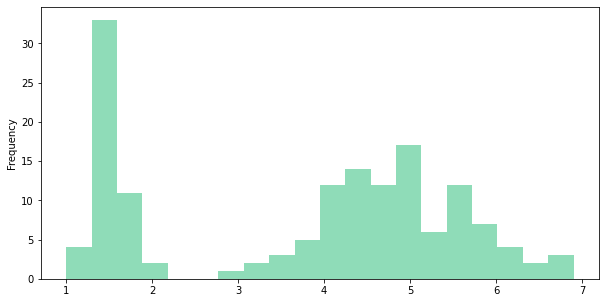

In [4]:
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Есть выброс "petal.length" в диапазоне примерно 1..1.9

### Зафиксируем исходные данные до заполнения NaN 

In [5]:
with_outliers = data["petal.length"].head(20).copy()
before_NaN = data["petal.width"].iloc[25:42].copy()

### Заменяем  выброс "petal.length" расчетными данными

#### длина лепестка не может быть отрицательной!

<ipython-input-6-7dd704a31cea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]<=2.8] = np.clip(np.random.normal(loc= data["petal.length"][data["petal.length"]>=2.8].median(),


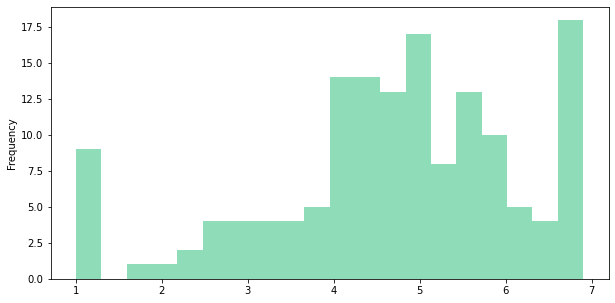

In [6]:
data["petal.length"][data["petal.length"]<=2.8] = np.clip(np.random.normal(loc= data["petal.length"][data["petal.length"]>=2.8].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]<=2.8])), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [7]:
### снова выбросы :-(
### убираем выброс минимумов ...

<ipython-input-8-2a7dfbc4bd5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]==data["petal.length"].min()] = np.clip(np.random.normal(loc= data["petal.length"].median(),


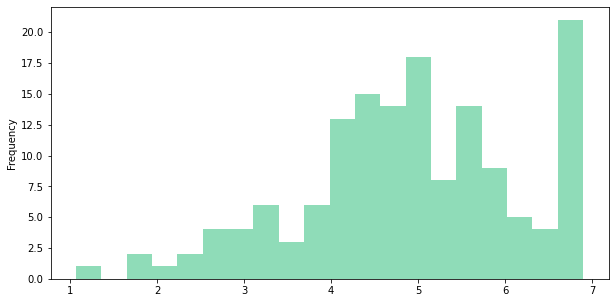

In [8]:
data["petal.length"][data["petal.length"]==data["petal.length"].min()] = np.clip(np.random.normal(loc= data["petal.length"].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]==data["petal.length"].min()]) ), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())



data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### ... и убираем выброс максимумов 

<ipython-input-9-1d557c6b9939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]==data["petal.length"].max()] = np.clip(np.random.normal(loc= data["petal.length"].median(),


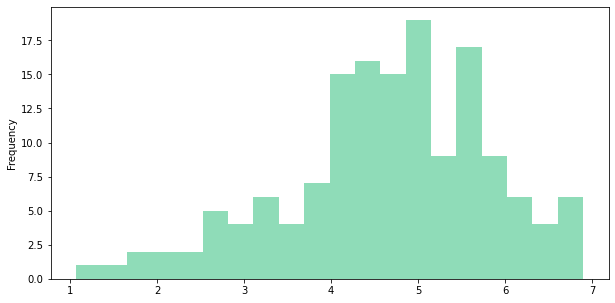

In [9]:
data["petal.length"][data["petal.length"]==data["petal.length"].max()] = np.clip(np.random.normal(loc= data["petal.length"].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]==data["petal.length"].max()]) ), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [10]:
display(pd.DataFrame(list(zip(with_outliers, data["petal.length"].head(20))),
                   columns=["With_outliers", "After_norm"]))

,With_outliers,After_norm
0,1.4,6.742126
1,1.4,4.400135
2,1.3,2.117810
3,1.5,4.870216
4,1.4,2.672651
5,1.7,4.256523
6,1.4,5.946776
7,1.5,3.813342
8,1.4,2.366461
9,1.5,2.544385


###### Выброс исчез

## Построение гистограмы для "petal.width"

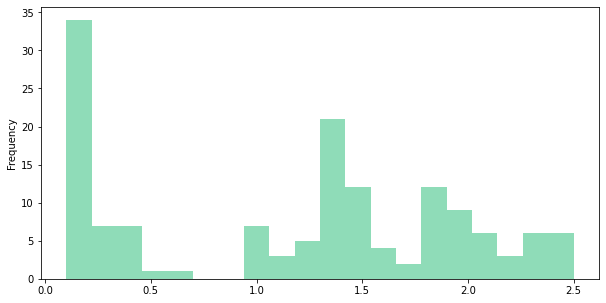

In [11]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### убеждаемся в наличии NaN

In [12]:
data["petal.width"][data["petal.width"].isnull()]

145   NaN
146   NaN
147   NaN
148   NaN
Name: petal.width, dtype: float64

### Заполняем пропуски

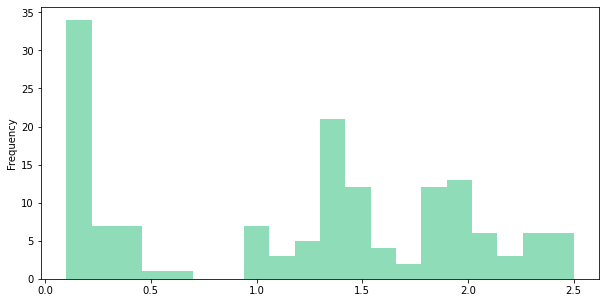

In [13]:
# используем std()
data["petal.width"].fillna(data["petal.width"].mean() 
                           + data["petal.width"].std()*np.random.randint(low=-1, high=2, size=1)[0], # ограничиваем отклонение
                          inplace=True)
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [14]:
data["petal.width"].tail(7)

143    2.300000
144    2.500000
145    1.930193
146    1.930193
147    1.930193
148    1.930193
149    1.800000
Name: petal.width, dtype: float64

### добавим еще пропусков (примерно 1/6)

<ipython-input-15-d66d3094cd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[125:139] = None
<ipython-input-15-d66d3094cd4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[25:42] = None


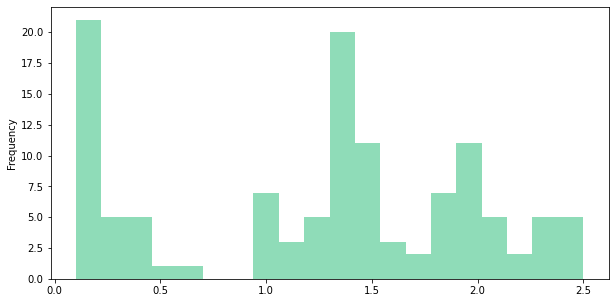

In [15]:
data["petal.width"].iloc[125:139] = None
data["petal.width"].iloc[25:42] = None
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [16]:
data["petal.width"].iloc[25:42]

25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
Name: petal.width, dtype: float64

### Подготовка корректирующих значений

In [17]:
df_corr = pd.DataFrame(np.random.normal(loc=data["petal.width"].mean(),
                                scale=data["petal.width"].var(), 
                                size=len(data["petal.width"])),
                      columns = ["petal.width"]) 
                                
df_corr                      

,petal.width
0,1.257931
1,1.556890
2,1.856604
3,0.479350
4,0.393377
...,...
145,1.822806
146,1.177532
147,0.852451
148,0.978727


In [18]:
df_corr.min() # больше нуля :-)

petal.width   -0.008823
dtype: float64

### Заполняем пропуски

In [19]:
data.fillna(value=df_corr, inplace=True)
display(pd.DataFrame(list(zip(before_NaN, data["petal.width"].iloc[25:42])),
                   columns=["before_set_NaN", "After_filling"]))

,before_set_NaN,After_filling
0,0.2,1.599047
1,0.4,0.644247
2,0.2,1.572283
3,0.2,1.276174
4,0.2,1.080045
5,0.2,1.381453
6,0.4,1.990447
7,0.1,1.258117
8,0.2,0.632081
9,0.2,1.281942


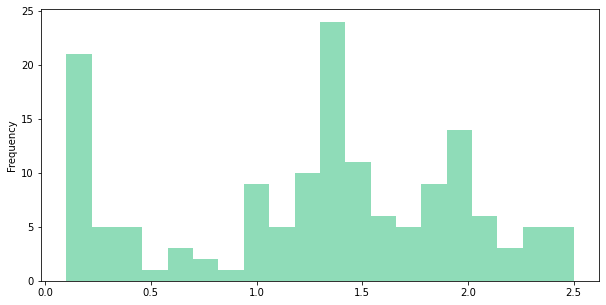

In [20]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Почти похоже на исходный :-)

### Снова генерируем пропуски, но в этот раз удаляем 

In [21]:
data["petal.width"].iloc[125:147] = None
data.tail(10)

<ipython-input-21-596890d67ab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[125:147] = None


,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,NaN,Virginica
141,6.9,3.1,5.1,NaN,Virginica
142,5.8,2.7,5.1,NaN,Virginica
143,6.8,3.2,5.9,NaN,Virginica
144,6.7,3.3,5.7,NaN,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,1.930193,Virginica
148,6.2,3.4,5.4,1.930193,Virginica
149,5.9,3.0,5.1,1.800000,Virginica


In [22]:
data.dropna(inplace=True)
data.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
118,7.7,2.6,5.602533,2.300000,Virginica
119,6.0,2.2,5.000000,1.500000,Virginica
120,6.9,3.2,5.700000,2.300000,Virginica
121,5.6,2.8,4.900000,2.000000,Virginica
122,7.7,2.8,6.700000,2.000000,Virginica
123,6.3,2.7,4.900000,1.800000,Virginica
124,6.7,3.3,5.700000,2.100000,Virginica
147,6.5,3.0,5.200000,1.930193,Virginica
148,6.2,3.4,5.400000,1.930193,Virginica
149,5.9,3.0,5.100000,1.800000,Virginica


### "Пропали" все строки с пропусками

## Заполняем смешанные пропуски
#### ...но сначала их создадим ))

In [23]:
display(data.head())
data.iloc[0:3] = None
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,6.742126,0.2,Setosa
1,4.9,3.0,4.400135,0.2,Setosa
2,4.7,3.2,2.117810,0.2,Setosa
3,4.6,3.1,4.870216,0.2,Setosa
4,5.0,3.6,2.672651,0.2,Setosa


,sepal.length,sepal.width,petal.length,petal.width,variety
0,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,None
3,4.6,3.1,4.870216,0.2,Setosa
4,5.0,3.6,2.672651,0.2,Setosa


In [24]:
values = {"sepal.length": data["sepal.length"][data["variety"]=="Setosa"].mean(),
          "sepal.width": data["sepal.width"][data["variety"]=="Setosa"].mean(), 
          "petal.length": data["petal.length"][data["variety"]=="Setosa"].median(), 
          "petal.width": data["petal.width"][data["variety"]=="Setosa"].median(),
          "variety": "Setosa"}
data.fillna(value=values, inplace=True)
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.012766,3.440426,4.253445,0.4,Setosa
1,5.012766,3.440426,4.253445,0.4,Setosa
2,5.012766,3.440426,4.253445,0.4,Setosa
3,4.600000,3.100000,4.870216,0.2,Setosa
4,5.000000,3.600000,2.672651,0.2,Setosa


## Extra case. Infinity

In [25]:
data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))
data.iloc[15:19]

<ipython-input-25-4ca883aff204>:1: RuntimeWarning: divide by zero encountered in log
  data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))
<ipython-input-25-4ca883aff204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))


,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,5.359301,inf,Setosa
16,5.4,3.9,4.063220,-inf,Setosa
17,5.1,3.5,6.205561,inf,Setosa
18,5.7,3.8,6.724534,-inf,Setosa


### Гистограмма не строится при наличии inf

In [26]:
data["petal.width"].describe()

count    128.000000
mean            NaN
std             NaN
min            -inf
25%        0.641206
50%        1.300000
75%        1.725000
max             inf
Name: petal.width, dtype: float64

In [27]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );
# Ой! Что-то пойдет не так!

ValueError: autodetected range of [-inf, inf] is not finite

## Заменяем inf и -inf на NaN

In [28]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.iloc[14:20]

,sepal.length,sepal.width,petal.length,petal.width,variety
14,5.8,4.0,5.181495,0.2,Setosa
15,5.7,4.4,5.359301,NaN,Setosa
16,5.4,3.9,4.063220,NaN,Setosa
17,5.1,3.5,6.205561,NaN,Setosa
18,5.7,3.8,6.724534,NaN,Setosa
19,5.1,3.8,4.489451,0.3,Setosa


### а дальше дело техники...

# Устранение пропусков в линиях/рядах

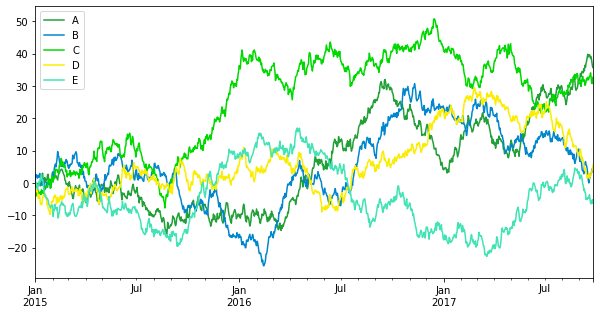

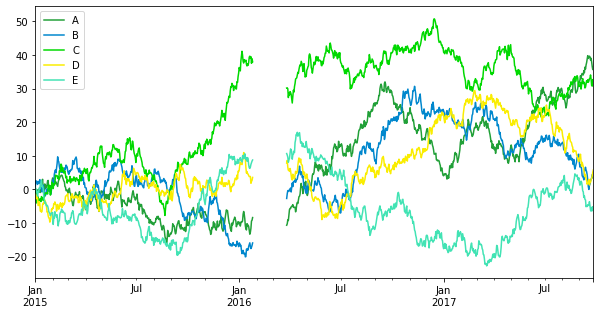

In [29]:
sbercolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72'] 
image_params = dict(figsize=(10,5), 
                color=sbercolors)
samples = np.random.randn(1000, 5)

df = pd.DataFrame(samples, 
                   index=pd.date_range("1/1/2015", periods=1000),
                   columns=list("ABCDE"))
df = df.cumsum()
df.plot(**image_params);    
before = df.iloc[400:420].copy()        
df.iloc[390:450] = None

df.plot(**image_params);
  

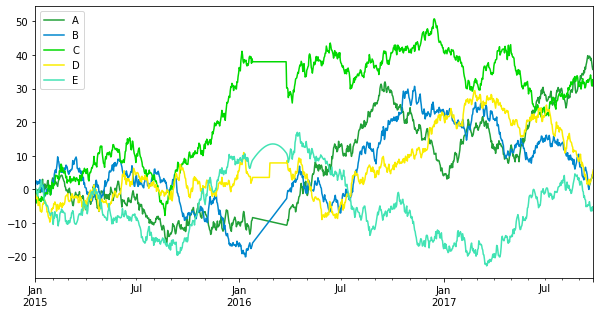

In [30]:
to_fill = {"A": df["A"].interpolate(method='linear'),
           "B": df["B"].interpolate(method='time'),
           "C": df["C"].interpolate(method='pad'),
           "D": df["D"].interpolate(method='nearest'),
           "E": df["E"].interpolate(method='akima'),}
df.fillna(value=to_fill, inplace=True)
df.plot(**image_params);


In [31]:
to_check = pd.concat((before,df.iloc[400:420]), axis=1)
to_check.columns = pd.MultiIndex.from_product([['Before', 'Recycled'], df.columns,],
                                     names=['subject', 'type'])

display(to_check) 

subject        Before                                             Recycled  \
type                A          B          C         D          E         A   
2016-02-05 -10.797708 -20.895231  38.906402  4.457028  15.275325 -8.795924   
2016-02-06 -10.934951 -21.858261  37.463995  3.607911  14.832581 -8.833325   
2016-02-07 -12.144796 -21.757918  38.387515  3.787063  15.394921 -8.870726   
2016-02-08 -12.545286 -21.665714  38.035303  3.094534  14.570226 -8.908127   
2016-02-09 -11.325250 -22.252979  36.512532  4.591396  15.165712 -8.945527   
2016-02-10 -11.065685 -23.462862  36.960571  5.228122  14.241081 -8.982928   
2016-02-11  -9.607061 -24.484019  35.586902  3.442799  13.579722 -9.020329   
2016-02-12 -10.004177 -23.915487  34.660818  3.813797  13.949700 -9.057729   
2016-02-13 -10.095245 -25.342589  35.137848  3.053325  14.139854 -9.095130   
2016-02-14  -9.826650 -25.652576  34.122507  4.308977  13.014368 -9.132531   
2016-02-15  -8.069987 -25.217717  34.056094  3.387604  12.058709 -9.169932   
2016-02-16  -9.340723 -24.786438  34.448263  3.698050  11.720583 -9.207332   
2016-02-17  -8.883747 -23.938067  35.135150  3.390419  11.778119 -9.244733   
2016-02-18  -9.787465 -22.051867  34.320848  4.486179  12.147953 -9.282134   
2016-02-19 -10.442752 -21.944470  34.402884  5.226049  12.426543 -9.319535   
2016-02-20 -11.813227 -21.118062  34.677007  5.093318  12.265766 -9.356935   
2016-02-21 -11.992117 -19.617148  33.089017  5.961959  11.760835 -9.394336   
2016-02-22 -10.687742 -18.439142  33.697243  6.207778  12.206312 -9.431737   
2016-02-23 -11.668762 -16.822429  33.303311  7.168097  12.553512 -9.469138   
2016-02-24 -10.485119 -16.570021  33.366513  6.759779  12.037781 -9.506538   

subject                                                
type                B          C         D          E  
2016-02-05 -13.551979  37.958088  3.559209  11.065000  
2016-02-06 -13.334989  37.958088  3.559209  11.244067  
2016-02-07 -13.118000  37.958088  3.559209  11.417193  
2016-02-08 -12.901011  37.958088  3.559209  11.584271  
2016-02-09 -12.684022  37.958088  3.559209  11.745195  
2016-02-10 -12.467033  37.958088  3.559209  11.899859  
2016-02-11 -12.250043  37.958088  3.559209  12.048156  
2016-02-12 -12.033054  37.958088  3.559209  12.189981  
2016-02-13 -11.816065  37.958088  3.559209  12.325225  
2016-02-14 -11.599076  37.958088  3.559209  12.453784  
2016-02-15 -11.382087  37.958088  3.559209  12.575551  
2016-02-16 -11.165097  37.958088  3.559209  12.690419  
2016-02-17 -10.948108  37.958088  3.559209  12.798282  
2016-02-18 -10.731119  37.958088  3.559209  12.899034  
2016-02-19 -10.514130  37.958088  3.559209  12.992568  
2016-02-20 -10.297141  37.958088  3.559209  13.078778  
2016-02-21 -10.080151  37.958088  3.559209  13.157558  
2016-02-22  -9.863162  37.958088  3.559209  13.228801  
2016-02-23  -9.646173  37.958088  3.559209  13.292401  
2016-02-24  -9.429184  37.958088  3.559209  13.348251

In [32]:
# set colors for min, max. average values
color_set = pd.DataFrame({"Colors":("MAX", "MIN", "AVERANGE")})

def highlight_fill(s):
    colors =  ['background-color: #42E3B4',
            'background-color: #0087CD',
             'background-color: #FAED00']
    return [colors[0] if i==0 else  colors[1] if i==1 else colors[2] for i in range(len(s))]


color_set = color_set.style.apply(highlight_fill)
display(color_set)

# count accurancy values

accurancy = pd.concat( (before-df.iloc[400:420],
                       pow((before-df.iloc[400:420]),2)), axis=1) 
accurancy.columns = pd.MultiIndex.from_product([['ABS', 'SQR'], df.columns,],
                                     names=['subject', 'type'])
# adding a row
accurancy.loc[-1] = [accurancy[a_s].mean() for a_s in accurancy.columns[:5].tolist()] +\
                    [np.sqrt(accurancy[a_s].sum()/(len(accurancy)-1)) for a_s in accurancy.columns[5:].tolist()]  

def highlight_diff_max(s):
    if max(abs(s))==max(s): 
        idx = s.tolist().index(max(abs(s)))
    elif max(abs(s))!=max(s):
        idx = s.tolist().index(max(s))
    return ['background-color: #42E3B4' if i==idx else '' for i in range(len(s))]

def highlight_diff_min(s):
    if min(abs(s))==min(s): 
        idx = s.tolist().index(min(abs(s)))
    elif min(abs(s))!=min(s):
        idx = s.tolist().index(min(s))
    return ['background-color: #0087CD' if i==idx else '' for i in range(len(s))]

def highlight_last_row(s):
    return ['background-color: #FAED00' if i==len(s)-1 else '' for i in range(len(s))]

accurancy = accurancy.style.apply(highlight_last_row).apply(highlight_diff_max).apply(highlight_diff_min)
accurancy


,Colors
0,MAX
1,MIN
2,AVERANGE
